In [2]:
import numpy as np
import pandas as pd

#prepare the dataset
data = pd.read_csv(r"data\titanic.csv", sep=',')
x = data["Age"].median()
data.fillna({"Age": x}, inplace = True)
data["Sex"] = data["Sex"].map({'male':1, 'female':0})
data_arr = np.asarray(data)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [5]:
from sklearn.model_selection import train_test_split

#test and train split
features = data_arr[:, 2:12]
label = data_arr[:,-11]
features=np.delete(features, [1], axis=1)
features=np.delete(features, [5], axis=1)
features=np.delete(features, [6], axis=1)
features=np.delete(features, [6], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=44)

In [15]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter = 1000)
logistic_reg.fit(X_train, y_train.astype(int))

LogisticRegression(max_iter=1000)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = logistic_reg.predict(X_test)
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       106
           1       0.68      0.70      0.69        73

    accuracy                           0.74       179
   macro avg       0.73      0.74      0.74       179
weighted avg       0.74      0.74      0.74       179



In [19]:
confusion_matrix(y_test.astype(int), y_pred.astype(int))

array([[82, 24],
       [22, 51]], dtype=int64)

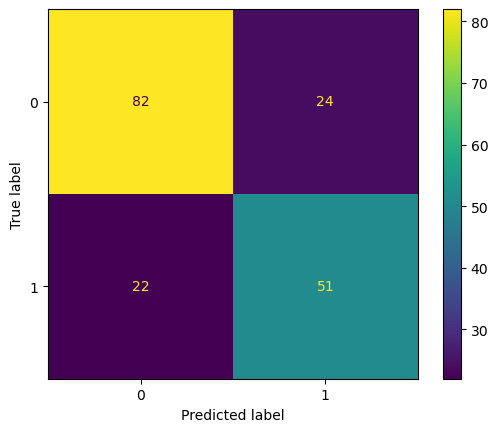

In [21]:
display = ConfusionMatrixDisplay(confusion_matrix(y_test.astype(int), y_pred.astype(int)))
display.plot()